In [1]:
import os
import sys
sys.path.append(os.path.abspath('../../Dynamic_AMM'))
from env.amm import AMM
from env.oracle import OracleSimulator
from env.trader import Arbitrager


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

def plot_comparison(initial_token):
    amm = AMM(fee_rate=0.003, initial_lr=initial_token, initial_ls=initial_token)

    total_size = amm.initial_lr
    swap_sizes = np.linspace(1, 100, 1000)
    in_fee_value = []
    out_fee_value = []
    initial_token_size = amm.initial_lr

    for swap_size in swap_sizes:
        amm.reset(fee_source=-1)
        info = amm.swap(-swap_size)
        pr = info['ls'] / info['lr']
        ps = info['lr'] / info['ls']
        total_fee_value = info['token_fee']['r'] * pr + info['token_fee']['s'] * ps
        out_fee_value.append(total_fee_value)
        
        amm.reset(fee_source=1)
        info = amm.swap(swap_size)
        pr = info['ls'] / info['lr']
        ps = info['lr'] / info['ls']
        total_fee_value = info['token_fee']['r'] * pr + info['token_fee']['s'] * ps
        in_fee_value.append(total_fee_value)
        
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Input fee values
    color = 'tab:green'
    ax1.set_xlabel('Swap Size', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Total Fee Value (input)', color=color, fontsize=12, fontweight='bold')
    ax1.plot(swap_sizes, in_fee_value, color=color, label='Input Fee')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)


    # Difference as bar chart with transparency
    ax2 = ax1.twinx()
    ax2.plot(swap_sizes, out_fee_value, color='blue', label='Output Fee', linestyle='dashed')
    ax2.set_ylabel(f'Total Fee Value (output)', color='tab:blue', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor=color)

    # Adding a combined legend
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    all_lines = lines + bars
    all_labels = labels + bar_labels

    ax1.legend(all_lines, all_labels, loc='upper left', fontsize=10, frameon=True)

    # Adding a title and legends
    plt.title(f'Total Fee Value vs Swap Size with Difference with initial reserve {amm.initial_lr}', fontsize=14, fontweight='bold')
    fig.tight_layout()
    plt.show()
    

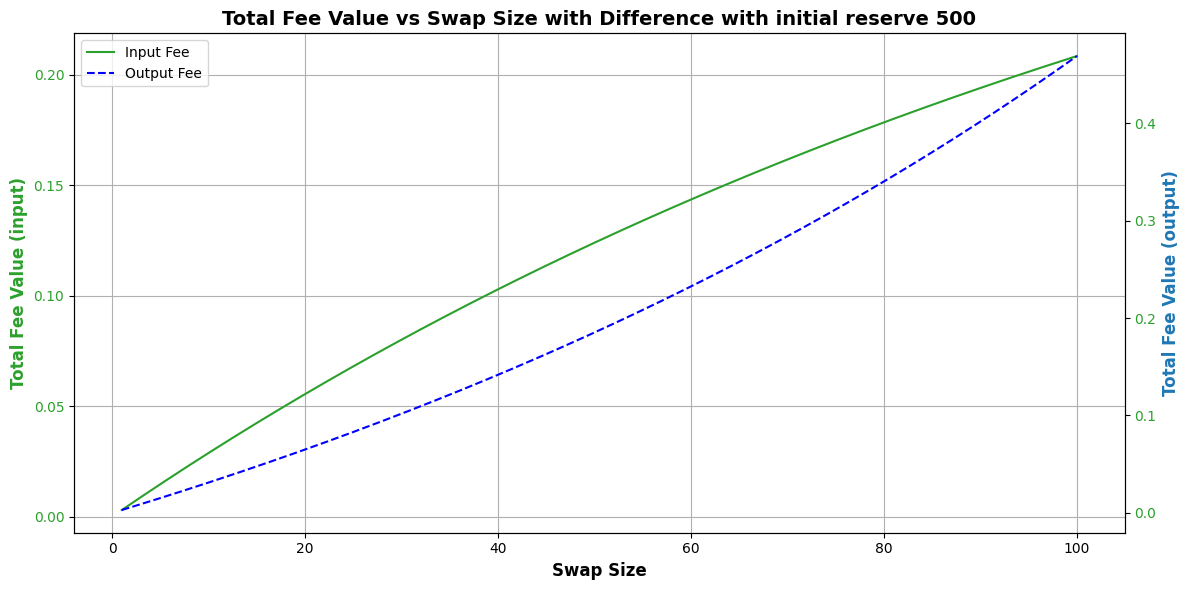

In [3]:
plot_comparison(initial_token=500)

In [4]:
def plot_fee_diff(initial_token):

    amm = AMM(fee_rate=0.003, initial_lr=initial_token, initial_ls=initial_token)

    total_size = amm.initial_lr
    swap_sizes = np.linspace(1, 100, 1000)
    in_fee_value = []
    out_fee_value = []
    initial_token_size = amm.initial_lr

    for swap_size in swap_sizes:
        amm.reset(fee_source=-1)
        info = amm.swap(-swap_size)
        pr = info['ls'] / info['lr']
        ps = info['lr'] / info['ls']
        total_fee_value = info['token_fee']['r'] * pr + info['token_fee']['s'] * ps
        out_fee_value.append(total_fee_value)
        
        amm.reset(fee_source=1)
        info = amm.swap(swap_size)
        pr = info['ls'] / info['lr']
        ps = info['lr'] / info['ls']
        total_fee_value = info['token_fee']['r'] * pr + info['token_fee']['s'] * ps
        in_fee_value.append(total_fee_value)


    # draw the plot for both income and output fee use left and right y-axis
    diff_fee = np.array(out_fee_value) - np.array(in_fee_value)
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Input fee values
    color = 'tab:green'
    ax1.set_xlabel('Swap Size', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Total Fee Value', color=color, fontsize=12, fontweight='bold')
    ax1.plot(swap_sizes, in_fee_value, color=color, label='Input Fee')
    ax1.plot(swap_sizes, out_fee_value, color='blue', label='Output Fee', linestyle='dashed')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)


    # Difference as bar chart with transparency
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.bar(swap_sizes, diff_fee, alpha=0.1, color=color, label='Difference Fee (output - input)')
    ax2.set_ylabel(f'Difference Fee Value', color='tab:red', fontsize=12, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor=color)
    bar_min, bar_max = diff_fee.min(), diff_fee.max()
    ax2.set_ylim([bar_min, bar_max])
    

    # Adding a combined legend
    lines, labels = ax1.get_legend_handles_labels()
    bars, bar_labels = ax2.get_legend_handles_labels()
    all_lines = lines + bars
    all_labels = labels + bar_labels

    ax1.legend(all_lines, all_labels, loc='upper left', fontsize=10, frameon=True)

    # Adding a title and legends
    plt.title(f'Total Fee Value Difference with initial reserve {amm.initial_lr}', fontsize=14, fontweight='bold')
    fig.tight_layout()
    plt.show()

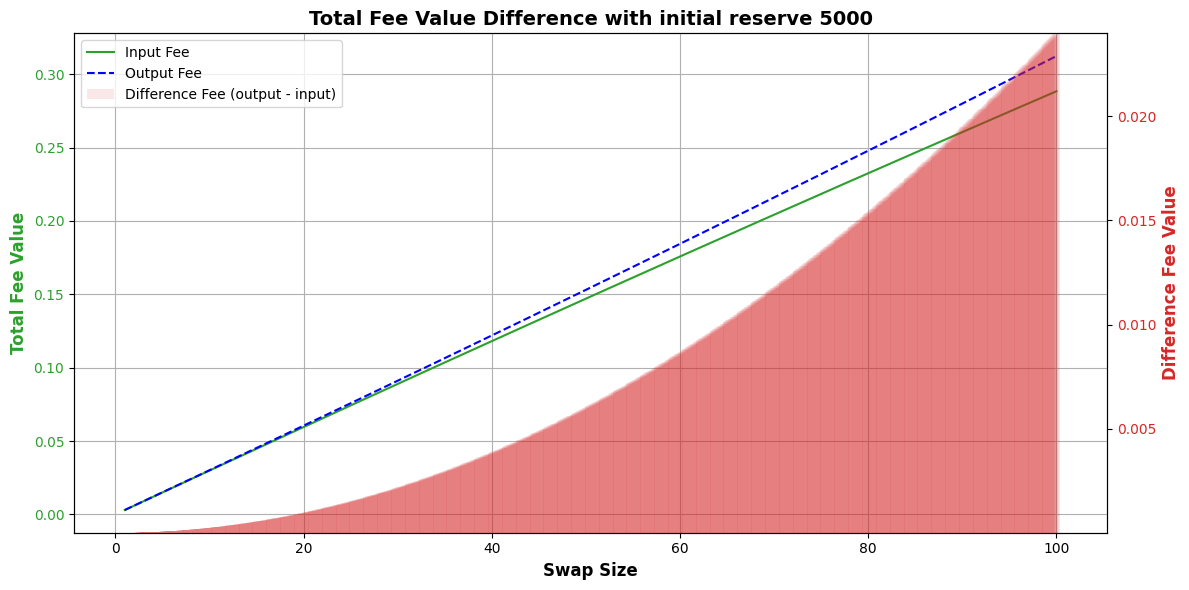

In [5]:
plot_fee_diff(initial_token=5000)

In [8]:
def plot_delta_fee_rate(max_swap_size=100):
    amm = AMM(fee_rate=0.003, initial_lr=100, initial_ls=100)
    swap_sizes = np.linspace(0, max_swap_size, 1000)
    f_stars = []
    ls = amm.initial_ls
    lr = amm.initial_lr
    f = amm.f
    for xr in swap_sizes:
        f_star = f * ((lr - xr) / (lr + (1-f) * xr)) ** 2
        f_stars.append(f_star)
        
    plt.figure(figsize=(12, 6))
    plt.plot(swap_sizes, f_stars, label=r"$f_{*}$", color='tab:blue')
    plt.xlabel(r'Swap Size $\Delta r$', fontsize=12, fontweight='bold')
    plt.ylabel(r'Nominal Fee Rate $f_{*}$', fontsize=12, fontweight='bold')
    plt.title(r'Nominal Fee Rate $f_{*}$ vs Swap Size $\Delta r$', fontsize=14, fontweight='bold')
    plt.grid(True)
    plt.legend([r"Initial Token = 100"], fontsize=12)
    plt.tight_layout()
    plt.show()

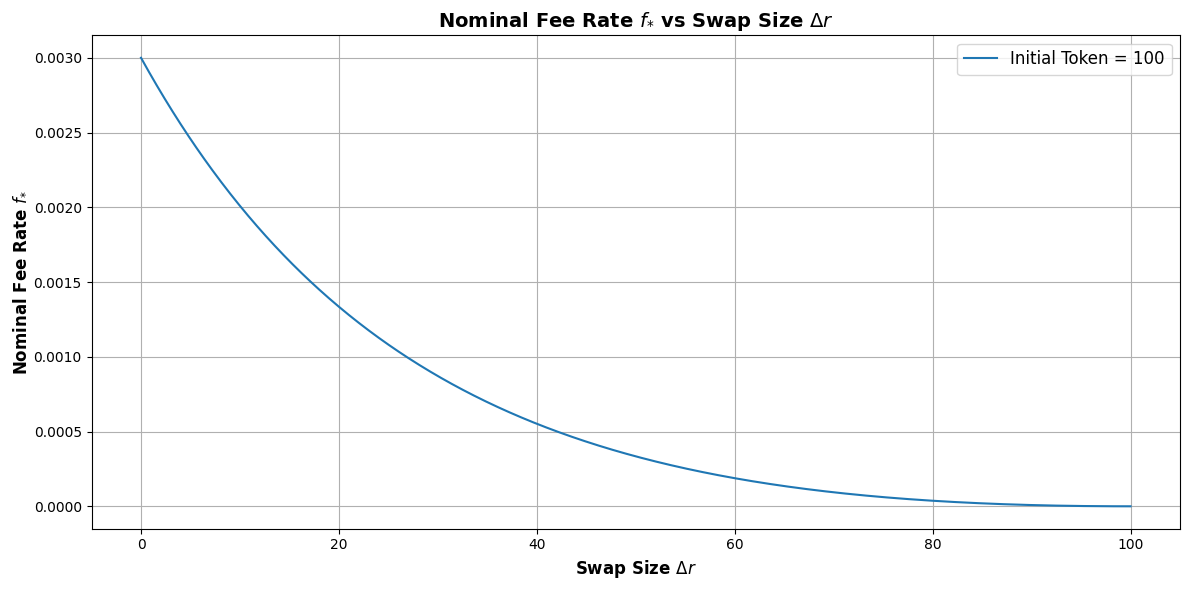

In [9]:
plot_delta_fee_rate(100)